# Загрузка и предобработка данных

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
diabetes_dataset = load_diabetes()
data = pd.DataFrame(diabetes_dataset.data,
                      columns=diabetes_dataset.feature_names)
data['Y'] = diabetes_dataset.target
data.shape

(442, 11)

In [19]:
data.head

<bound method NDFrame.head of           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6      Y  
0 

In [22]:
# DataFrame не содержащий целевой признак
X_ALL = data.drop('Y', axis=1)

In [23]:
# Нужно ли масштабирование
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [24]:
# Функция для восстановления датафрейма
# на основе масштабированных данных

def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [25]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Y'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((353, 10), (89, 10))

# Задача 18

### Для набора данных проведите масштабирование данных для одного (произвольного) числового признака на основе Z-оценки.

In [26]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787,0.151508
438,-0.115937,1.065488,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819,0.935254
439,0.876870,1.065488,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649,0.325674
440,-0.956004,-0.938537,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163,-0.545154


In [27]:
data_cs11_scaled.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000,4.420000e+02
mean,-8.037814e-18,2.290777e-16,2.009453e-17,-1.607563e-17,8.037814e-18,4.018907e-18,-4.018907e-18,2.330966e-16,0.000000,-4.018907e-17
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133,1.001133e+00
min,-2.254290e+00,-9.385367e-01,-1.897929e+00,-2.363050e+00,-2.665411e+00,-2.430626e+00,-2.150883e+00,-1.606102e+00,-2.651040,-2.896390e+00
25%,-7.841722e-01,-9.385367e-01,-7.196249e-01,-7.706500e-01,-7.200196e-01,-6.382488e-01,-7.382960e-01,-8.303008e-01,-0.698949,-6.975491e-01
50%,1.131724e-01,-9.385367e-01,-1.531324e-01,-1.192138e-01,-9.084100e-02,-8.029125e-02,-1.384305e-01,-5.449919e-02,-0.040937,-2.265729e-02
75%,8.005001e-01,1.065488e+00,6.569519e-01,7.493678e-01,5.961931e-01,6.274425e-01,6.162390e-01,7.213025e-01,0.681851,5.869224e-01
max,2.327895e+00,1.065488e+00,3.585718e+00,2.776058e+00,3.235851e+00,4.179278e+00,3.809072e+00,3.894331e+00,2.808722,2.851075e+00


In [28]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

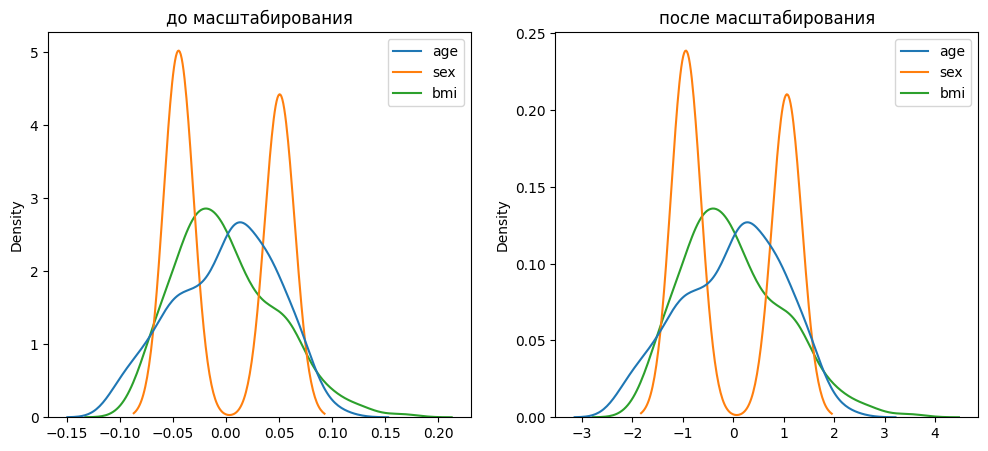

In [29]:
draw_kde(['age', 'sex', 'bmi'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [31]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [32]:
data_cs12_scaled_train.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02
mean,-1.509652e-17,1.610295e-16,2.516086e-18,-2.012869e-17,-5.032172e-18,-3.019303e-17,-6.038607e-17,1.585134e-16,-2.264478e-17,-3.774129e-17
std,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00
min,-2.262150e+00,-9.262261e-01,-1.915758e+00,-2.376397e+00,-2.685044e+00,-2.473851e+00,-2.166235e+00,-1.631226e+00,-2.620554e+00,-2.857210e+00
25%,-7.275311e-01,-9.262261e-01,-7.265375e-01,-7.147912e-01,-7.160882e-01,-6.376931e-01,-7.511056e-01,-8.554566e-01,-7.017380e-01,-6.494753e-01
50%,1.165093e-01,-9.262261e-01,-1.431463e-01,-1.368415e-01,-1.080284e-01,-1.254316e-01,-1.221591e-01,-7.968673e-02,-4.561836e-02,2.982775e-02
75%,7.303569e-01,1.079650e+00,6.646260e-01,7.300832e-01,5.579418e-01,6.196760e-01,5.854058e-01,6.960831e-01,6.807662e-01,6.242179e-01
max,2.341707e+00,1.079650e+00,3.514267e+00,2.752907e+00,3.192868e+00,4.205506e+00,3.808757e+00,3.868982e+00,2.746140e+00,2.747040e+00


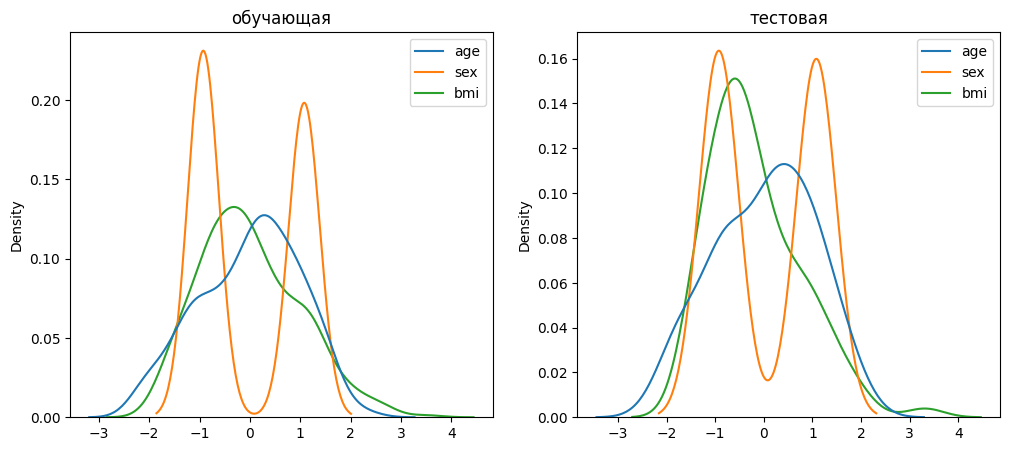

In [33]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['age', 'sex', 'bmi'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

# Задача 38

### Для набора данных проведите процедуру отбора признаков (feature selection). Используйте класс SelectKBest для 10 лучших признаков, и метод, основанный на взаимной информации.

In [53]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
x, y = data, data['Y']
print(x.shape,y.shape)

(442, 11) (442,)


In [54]:
x_new = SelectKBest(mutual_info_regression, k=10).fit_transform(X, y)
print(x_new.shape,y.shape)

(442, 10) (442,)


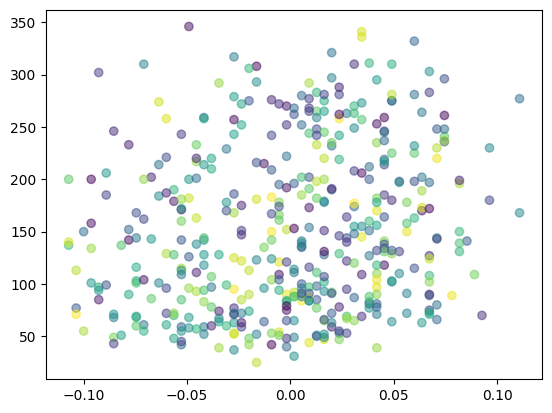

In [61]:
N = 442
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
a_scatter = data['age']
plt.scatter(a_scatter, y,  c=colors, alpha=0.5)
plt.show()